In [4]:
import matplotlib.pyplot as plt
import json



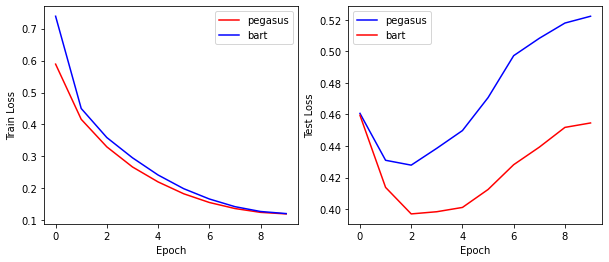

In [5]:
bart = json.load(open('model_weights/bart_datav1/record.json'))
pegasus = json.load(open('model_weights/pegasus_datav1/record.json'))

x = [i for i in range(len(bart['train_loss']))]
fig,axes = plt.subplots(1,2,figsize=(10,4))

axes[0].plot(x,pegasus['train_loss'],color='red',label='pegasus')
axes[0].plot(x,bart['train_loss'],color='blue',label='bart')
axes[0].set_ylabel('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(x,pegasus['test_loss'],color='blue',label='pegasus')
axes[1].plot(x,bart['test_loss'],color='red',label='bart')
axes[1].set_ylabel('Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()

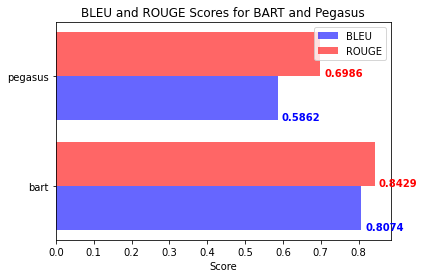

In [10]:

bart = json.load(open('model_weights/bart_datav1/eval.json'))
pegasus = json.load(open('model_weights/pegasus_datav1/eval_ep8.json'))
# bleu
x = ['bleu','rouge']
bleu = [max(bart['bleu']),max(pegasus['bleu'])]
rouge = [max(bart['rouges']),max(pegasus['rouges'])]

# 数据组合
scores = [bleu, rouge]
models = ['bart', 'pegasus']

# 创建一个横向柱状图
fig, ax = plt.subplots()

# 设置柱状图位置
y_pos = range(len(models))

# 绘制蓝色的柱状图
ax.barh(y_pos, bleu, color='blue', alpha=0.6, height=0.4, label='BLEU')
for i, v in enumerate(bleu):
    ax.text(v + 0.01, i - 0.2, f'{v:.4f}', color='blue', fontweight='bold')

# 绘制红色的柱状图
ax.barh([p + 0.4 for p in y_pos], rouge, color='red', alpha=0.6, height=0.4, label='ROUGE')
for i, v in enumerate(rouge):
    ax.text(v + 0.01, i + 0.2, f'{v:.4f}', color='red', fontweight='bold')

# 添加标签和标题
ax.set_yticks([p + 0.2 for p in y_pos])
ax.set_yticklabels(models)
ax.set_xlabel('Score')
ax.set_title('BLEU and ROUGE Scores for BART and Pegasus')

# 添加图例
ax.legend()

# 显示图形
plt.show()
